In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
iters = [50, 250, 500]
ms = []
for iter in iters:
    df = pd.read_csv("results/output2.csv")
    df = df[df['iteration']==iter]
    df = df.groupby(['sigma', 'rho', 'Q']).mean().reset_index()
    ms.append(df.pivot(index='rho', columns='Q', values='bestLength'))

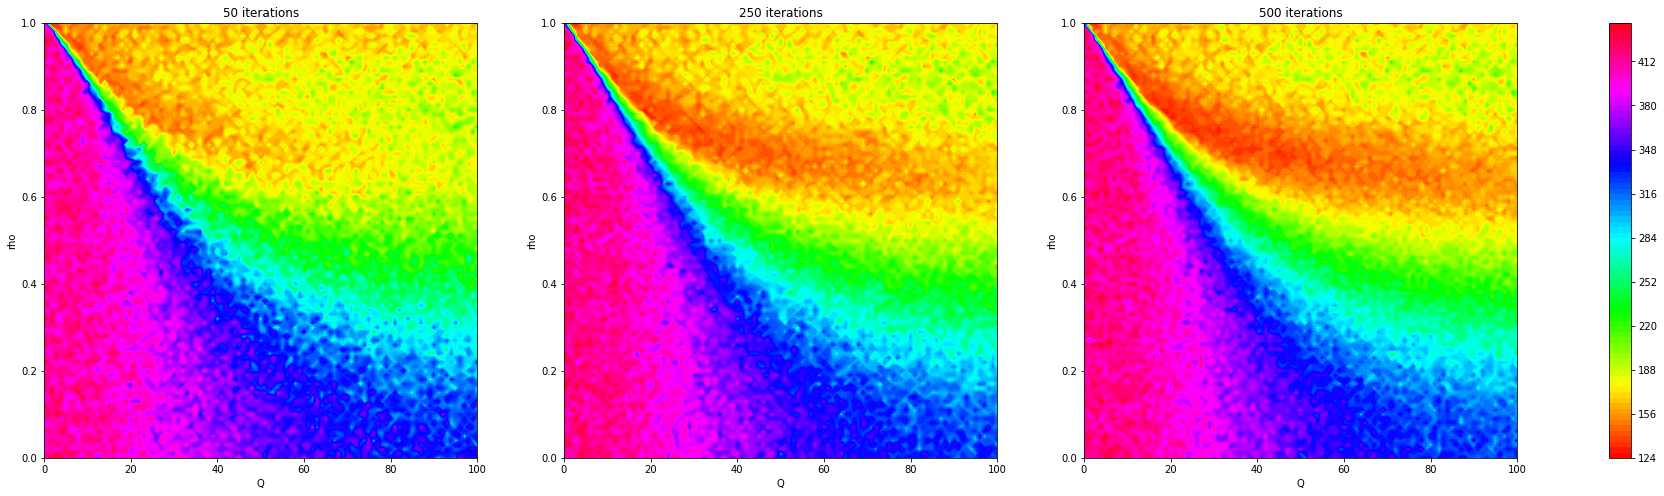

In [7]:
fig, axs = plt.subplots(1, len(iters), figsize=(len(iters)*10+3, 8))
for i in range(len(iters)):
    matrix = ms[i]
    X=matrix.columns.values
    Y=matrix.index.values
    Z=matrix.values
    axs[i].set_title(str(iters[i]) + ' iterations')
    axs[i].set_xlabel('Q')
    axs[i].set_ylabel('rho')
    cs = axs[i].contourf(X,Y,Z,100, cmap='hsv')

plt.colorbar(cs, ax=axs)
plt.show()

In [27]:
df_half = pd.read_csv("results/output-half.csv")
df_full = pd.read_csv("results/output-full.csv")
df_double = pd.read_csv("results/output.csv")

dfs = [df_half, df_full, df_double]

ms = []
for df in dfs:
    df = df[df['iteration']==50]
    df = df.groupby(['rho', 'Q']).mean().reset_index()
    ms.append(df.pivot(index='rho', columns='Q', values='bestLength'))

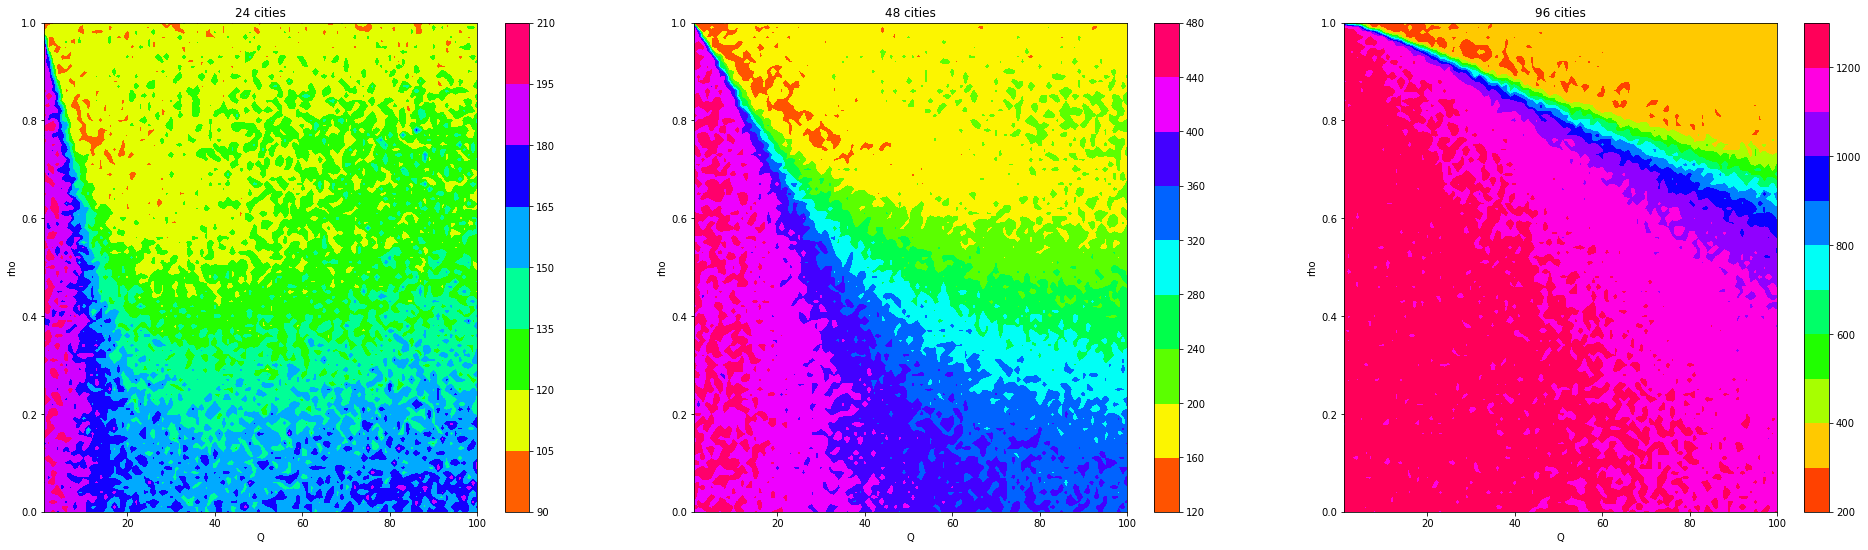

In [30]:
fig, axs = plt.subplots(1, len(ms), figsize=(len(ms)*10+3, 9))
titles = ["24 cities", "48 cities", "96 cities"]
for i in range(len(ms)):
    matrix = ms[i]
    X=matrix.columns.values
    Y=matrix.index.values
    Z=matrix.values
    axs[i].set_title(titles[i])
    axs[i].set_xlabel('Q')
    axs[i].set_ylabel('rho')
    cs = axs[i].contourf(X,Y,Z,10, cmap='hsv')
    plt.colorbar(cs, ax=axs[i])

plt.show()